<a href="https://colab.research.google.com/github/Asma-malica/Codecasa/blob/main/ML_HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NECESSARY LIBRARIES AND DATASET

In [50]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

trainData=pd.read_csv('/content/train.csv')
testData= pd.read_csv('/content/test.csv')


In [51]:
trainData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [52]:
trainData.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [53]:
trainData.shape

(29451, 12)

In [54]:
trainData['TARGET(PRICE_IN_LACS)'].describe()

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

<ipython-input-55-15d2cc4e2e02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormatrix=trainData.corr()


<Axes: >

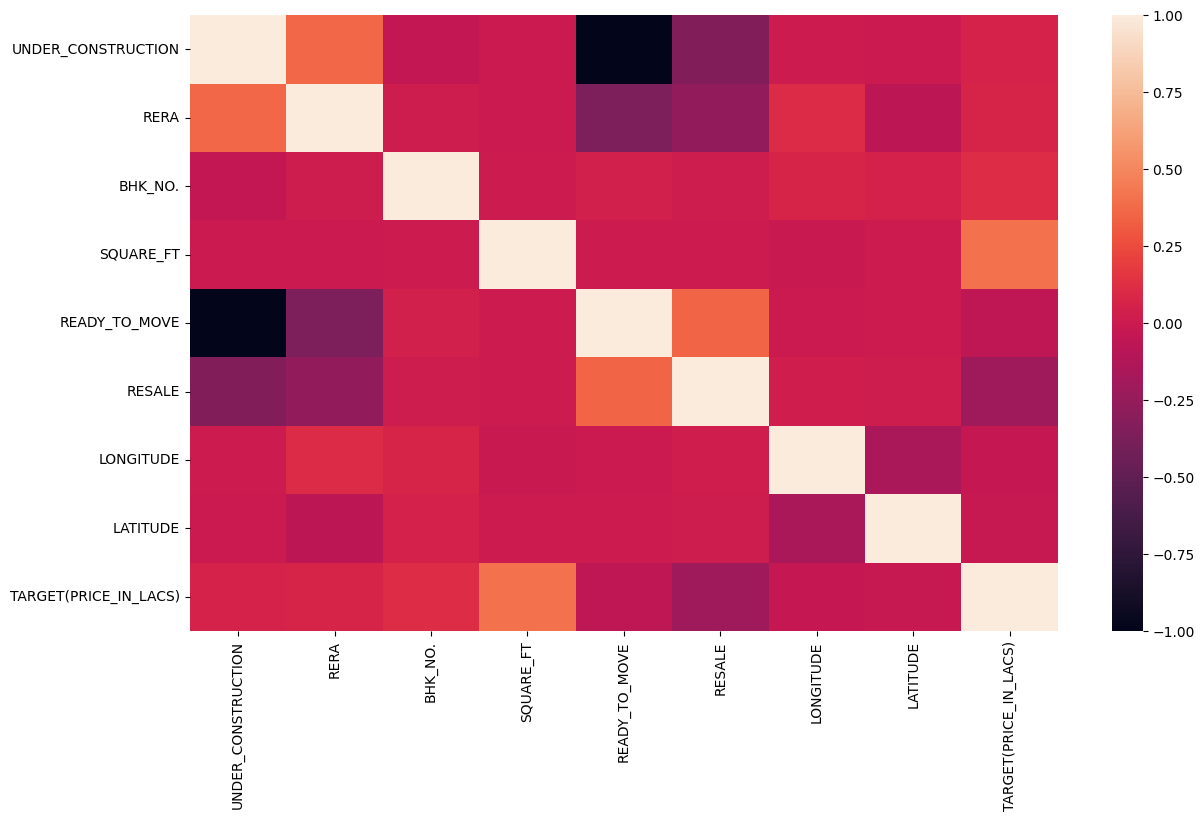

In [55]:
cormatrix=trainData.corr()
plt.figure(figsize=(14,8))
sns.heatmap(cormatrix)

In [56]:
k=11
maxcor=cormatrix.nlargest(k,'TARGET(PRICE_IN_LACS)')['TARGET(PRICE_IN_LACS)'].index
cm = np.corrcoef(trainData[maxcor].values.T)

df_train=trainData[maxcor]
df_train.head(20)

,TARGET(PRICE_IN_LACS),SQUARE_FT,BHK_NO.,RERA,UNDER_CONSTRUCTION,LATITUDE,LONGITUDE,READY_TO_MOVE,RESALE
0,55.0,1300.236407,2,0,0,77.597960,12.969910,1,1
1,51.0,1275.000000,2,0,0,76.644605,12.274538,1,1
2,43.0,933.159722,2,0,0,77.632191,12.778033,1,1
3,62.5,929.921143,2,1,0,77.344500,28.642300,1,1
4,60.5,999.009247,2,0,1,88.484911,22.592200,0,1
5,42.0,1250.000000,3,0,0,76.282571,10.033280,1,1
6,66.5,1495.053957,3,0,0,75.795600,26.916347,1,1
7,52.0,1181.012946,3,1,0,76.650000,30.740000,1,1
8,41.6,1040.000000,2,1,0,77.674002,13.054202,1,1
9,36.0,879.120879,2,1,0,80.140970,12.951610,1,1


In [57]:
df_train.isna()

,TARGET(PRICE_IN_LACS),SQUARE_FT,BHK_NO.,RERA,UNDER_CONSTRUCTION,LATITUDE,LONGITUDE,READY_TO_MOVE,RESALE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
29446,False,False,False,False,False,False,False,False,False
29447,False,False,False,False,False,False,False,False,False
29448,False,False,False,False,False,False,False,False,False
29449,False,False,False,False,False,False,False,False,False


In [58]:
df_train.isnull().sum()

TARGET(PRICE_IN_LACS)    0
SQUARE_FT                0
BHK_NO.                  0
RERA                     0
UNDER_CONSTRUCTION       0
LATITUDE                 0
LONGITUDE                0
READY_TO_MOVE            0
RESALE                   0
dtype: int64

PREPROCESSING OF TEST DATA

In [59]:
testData.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [60]:
testData.shape


(68720, 11)

In [61]:
df_test = testData[['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE']]
df_test.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [62]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [63]:
df_test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [64]:
df_test=df_test.fillna(0)

In [65]:
df_test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

SPLITING THE TRAIN DATASET

In [66]:
from sklearn.model_selection import train_test_split
X=df_train.drop(columns=["TARGET(PRICE_IN_LACS)"])
y=df_train["TARGET(PRICE_IN_LACS)"]
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(26505, 8)
(26505,)
(2946, 8)
(2946,)


RANDOM FOREST

In [71]:
from sklearn.ensemble import RandomForestRegressor
RFModel= RandomForestRegressor(n_estimators=1000,max_depth=3,random_state=33)
RFModel.fit(X_train, y_train)
train_score_RF=RFModel.score(X_train,y_train)
test_score_RF=RFModel.score(X_val,y_val)
print("model train score",train_score_RF)
print("model test score",test_score_RF)


model train score 0.9090213441554753
model test score 0.6612201453765439
